# data clearning
## import train data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 
%matplotlib inline

In [2]:
#data
data_train=pd.read_csv('flight_delays_train.csv')
data_train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
Month                100000 non-null object
DayofMonth           100000 non-null object
DayOfWeek            100000 non-null object
DepTime              100000 non-null int64
UniqueCarrier        100000 non-null object
Origin               100000 non-null object
Dest                 100000 non-null object
Distance             100000 non-null int64
dep_delayed_15min    100000 non-null object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


## data processing (1)

In [4]:
#提取月份，日期和周
data_train['Month'] = data_train['Month'].str[2:].astype('int')
data_train['DayofMonth'] = data_train['DayofMonth'].str[2:].astype('int')
data_train['DayOfWeek'] = data_train['DayOfWeek'].str[2:].astype('int')

#把Y转换成0，1
target_dict={'N':0,'Y':1}
data_train['dep_delayed_15min']=data_train['dep_delayed_15min'].map(target_dict)

#提取具体起飞小时，分钟
data_train['DepTime_hour']=data_train['DepTime']//100
data_train['DepTime_min']=data_train['DepTime']%100

#将时间分割成早中晚三部分
def hour_to_mae(x):
    if (x>6) & (x<12):
        return 'Morning'
    elif (x>12) & (x<18):
        return 'Afternoon'
    else:
        return 'Night'

data_train['mae']=data_train['DepTime_hour'].map(hour_to_mae)

In [5]:
#查看现在的数据
data_train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,DepTime_hour,DepTime_min,mae
0,8,21,7,1934,AA,ATL,DFW,732,0,19,34,Night
1,4,20,3,1548,US,PIT,MCO,834,0,15,48,Afternoon
2,9,2,5,1422,XE,RDU,CLE,416,0,14,22,Afternoon
3,11,25,6,1015,OO,DEN,MEM,872,0,10,15,Morning
4,10,7,6,1828,WN,MDW,OMA,423,1,18,28,Night


## data distribution

Text(0, 0.5, 'Distance')

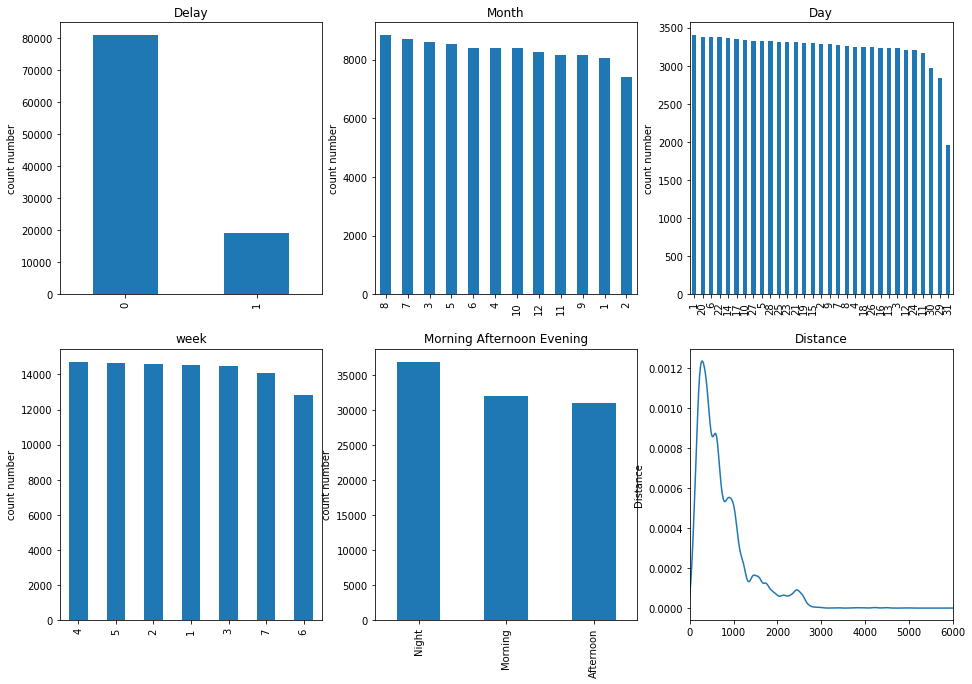

In [6]:
fig = plt.figure(figsize=(16,11))
fig.set(alpha=0.2) 

plt.subplot2grid((2,3),(0,0))   
data_train.dep_delayed_15min.value_counts().plot(kind='bar')
plt.title('Delay')
plt.ylabel('count number')  

plt.subplot2grid((2,3),(0,1))   
data_train.Month.value_counts().plot(kind='bar')
plt.title('Month')
plt.ylabel('count number')  

plt.subplot2grid((2,3),(0,2))   
data_train.DayofMonth.value_counts().plot(kind='bar')
plt.title('Day')
plt.ylabel('count number')  

plt.subplot2grid((2,3),(1,0))   
data_train.DayOfWeek.value_counts().plot(kind='bar')
plt.title('week')
plt.ylabel('count number')  

plt.subplot2grid((2,3),(1,0))   
data_train.DayOfWeek.value_counts().plot(kind='bar')
plt.title('week')
plt.ylabel('count number')  

plt.subplot2grid((2,3),(1,1))   
data_train.mae.value_counts().plot(kind='bar')
plt.title('Morning Afternoon Evening')
plt.ylabel('count number')  

plt.subplot2grid((2,3),(1,2))   
data_train.Distance.plot(kind='kde',xlim=[0,6000])
plt.title('Distance')
plt.ylabel('Distance') 

## observe features v.s. target

### Month

<Figure size 576x576 with 0 Axes>

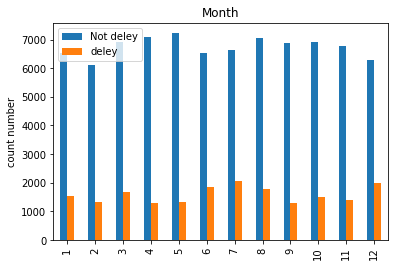

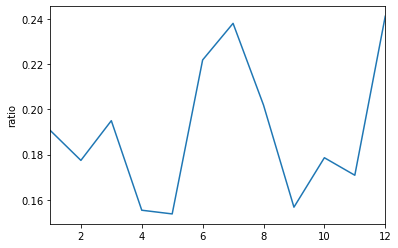

In [7]:
#月份
fig = plt.figure(figsize=(8,8))
fig.set(alpha=0.2) 
deley_month={}
for month in range(1,13):
    deley_month[month]=data_train.dep_delayed_15min[data_train.Month==month].value_counts()

deley_month=pd.DataFrame(deley_month)

deley_month.transpose().plot(kind='bar')
plt.title('Month')
plt.ylabel('count number')  
plt.legend(['Not deley','deley'])

fig = plt.figure()
rate_month=deley_month.loc[1]/deley_month.sum()
plt.ylabel('ratio')
rate_month.plot()

### Day

<Figure size 576x576 with 0 Axes>

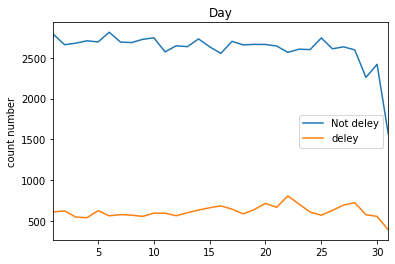

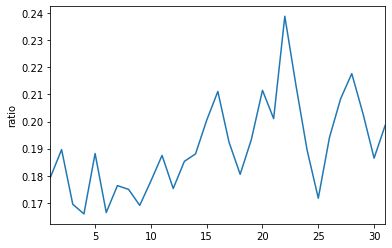

In [8]:
#天数
fig = plt.figure(figsize=(8,8))
fig.set(alpha=0.2) 
deley_day={}
for day in range(1,32):
    deley_day[day]=data_train.dep_delayed_15min[data_train.DayofMonth==day].value_counts()

deley_day=pd.DataFrame(deley_day)

deley_day.transpose().plot(kind='line')
plt.title('Day')
plt.ylabel('count number')  
plt.legend(['Not deley','deley'])

fig = plt.figure()
rate_day=deley_day.loc[1]/deley_day.sum()
plt.ylabel("ratio")
rate_day.plot()

### Week

<Figure size 576x576 with 0 Axes>

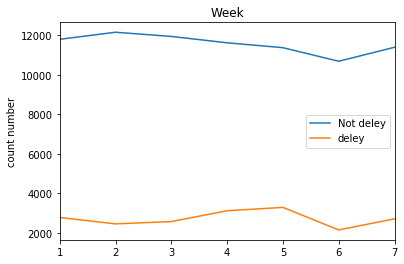

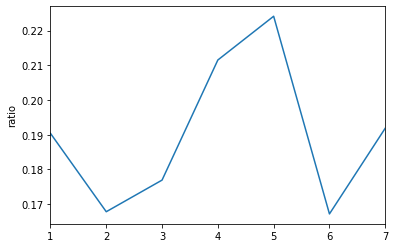

In [9]:
#week
fig = plt.figure(figsize=(8,8))
fig.set(alpha=0.2) 
deley_week={}
for week in range(1,8):
    deley_week[week]=data_train.dep_delayed_15min[data_train.DayOfWeek==week].value_counts()

deley_week=pd.DataFrame(deley_week)

deley_week.transpose().plot(kind='line')
plt.title('Week')
plt.ylabel('count number')  
plt.legend(['Not deley','deley'])

fig = plt.figure()
rate_week=deley_week.loc[1]/deley_week.sum()
plt.ylabel("ratio")
rate_week.plot()

### mae

<Figure size 576x576 with 0 Axes>

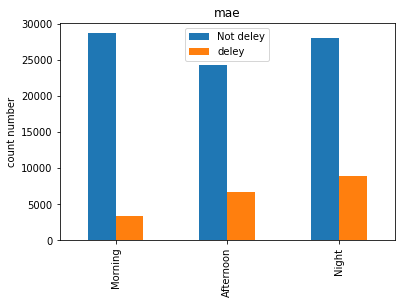

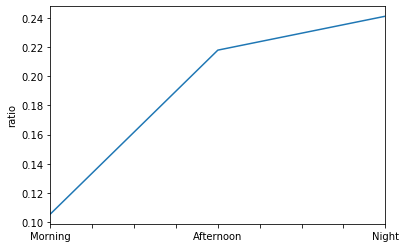

In [10]:
#mae
fig = plt.figure(figsize=(8,8))
fig.set(alpha=0.2) 
deley_mae={}
for mae in ['Morning','Afternoon','Night']:
    deley_mae[mae]=data_train.dep_delayed_15min[data_train.mae==mae].value_counts()

deley_mae=pd.DataFrame(deley_mae)

deley_mae.transpose().plot(kind='bar')
plt.title('mae')
plt.ylabel('count number')  
plt.legend(['Not deley','deley'])

fig = plt.figure()
rate_mae=deley_mae.loc[1]/deley_mae.sum()
plt.ylabel('ratio')
rate_mae.plot()

### Distance

,deley,not deley
count,19044.000000,80956.000000
mean,726.157740,730.159198
std,544.388349,581.500132
min,30.000000,31.000000
25%,328.000000,316.000000
50%,589.000000,569.000000
75%,954.000000,957.000000
max,4962.000000,4962.000000


<Figure size 576x576 with 0 Axes>

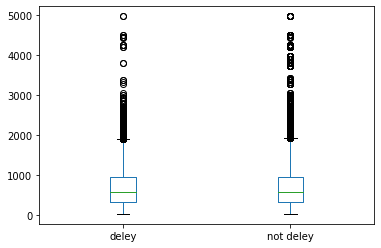

In [11]:
#距离
fig = plt.figure(figsize=(8,8))
fig.set(alpha=0.2) 

distance_deley=data_train.Distance[data_train.dep_delayed_15min==1]
distance_notdeley=data_train.Distance[data_train.dep_delayed_15min==0]

dis=pd.DataFrame({'deley':distance_deley,'not deley':distance_notdeley})
dis.plot(kind='box')
dis.describe()

## factorize
### data_train

In [12]:
dummies_mae=pd.get_dummies(data_train['mae'],prefix='mae')
dummies_Origin=pd.get_dummies(data_train['Origin'],prefix='Origin')
dummies_Dest=pd.get_dummies(data_train['Dest'],prefix='Dest')
dummies_UniqueCarrier=pd.get_dummies(data_train['UniqueCarrier'],prefix='UniqueCarrier')

data_train=pd.concat([data_train,dummies_mae,dummies_Origin,dummies_Dest,dummies_UniqueCarrier],axis=1)

save_mae = data_train['mae']
save_UniqueCarrier = data_train['UniqueCarrier']

data_train.drop(['mae'],inplace=True,axis=1)
data_train.drop(['UniqueCarrier'],inplace=True,axis=1)

data_train.head()

,Month,DayofMonth,DayOfWeek,DepTime,Origin,Dest,Distance,dep_delayed_15min,DepTime_hour,DepTime_min,...,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_TZ,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
0,8,21,7,1934,ATL,DFW,732,0,19,34,...,0,0,0,0,0,0,0,0,0,0
1,4,20,3,1548,PIT,MCO,834,0,15,48,...,0,0,0,0,0,0,1,0,0,0
2,9,2,5,1422,RDU,CLE,416,0,14,22,...,0,0,0,0,0,0,0,0,1,0
3,11,25,6,1015,DEN,MEM,872,0,10,15,...,0,0,0,1,0,0,0,0,0,0
4,10,7,6,1828,MDW,OMA,423,1,18,28,...,0,0,0,0,0,0,0,1,0,0


In [13]:
data_copy = data_train.copy()
data_copy['one']=1
dataOD = data_copy.groupby(by=['Origin','Dest']).sum()[['dep_delayed_15min','one']]

In [14]:
dataOD['ratio'] = dataOD.dep_delayed_15min / dataOD.one

In [15]:
X=dataOD.ratio
X_mean = np.mean(X)

X_p = (X - X_mean) / X_mean

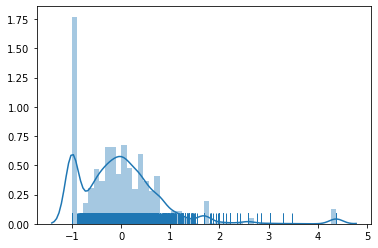

In [16]:
import seaborn as sns 
sns.distplot(X_p.values, rug=True)

In [17]:
X_max=X_p.quantile(0.7)
X_min=X_p.quantile(0.3)

In [18]:
mulindex = X_p.index.tolist()

In [19]:
positive = X_p[X_p.values > X_max]
positive_index = set(positive.index)
negative = X_p[X_p.values < X_min]
negative_index = set(negative.index)

In [20]:
p_data=list(np.zeros(data_copy.shape[0],dtype=int))
n_data=list(np.zeros(data_copy.shape[0],dtype=int))
e_data=list(np.zeros(data_copy.shape[0],dtype=int))

for i in range(data_copy.shape[0]):
    k=(data_copy.loc[i,'Dest'],data_copy.loc[i,'Origin'])
    if k in positive:
        p_data[i]=1
        
    elif k in negative:
        
        n_data[i]=1
        
    else:
        e_data[i]=1


In [21]:
sum(n_data)

17339

In [22]:
data_temp  = pd.read_csv('datasimple.csv')
data_temp['airport_comb_p'] = p_data
data_temp['airport_comb_n'] = n_data
data_temp['airport_comb_e'] = e_data

data_temp['ap_comb']=list(np.array(p_data)-np.array(n_data)) 

data_temp.to_csv('datasimple2.csv')

## data processing(2)（3）

In [23]:
airport=pd.read_csv('airport_nonull.csv')
#所有出现过的机场
place=set(data_train['Dest'].values)|set(data_train['Origin'].values)
#建立转换字典
place2type={airport.iata_code.values[i]:airport.type.values[i] for i in range(9120) if airport.iata_code.values[i] in place}

data_train['Dest_type']=data_train['Dest'].map(place2type)
data_train['Origin_type']=data_train['Origin'].map(place2type)

dummies_train_Dest=pd.get_dummies(data_train['Dest_type'],prefix='Dest_type')
dummies_train_Origin=pd.get_dummies(data_train['Origin_type'],prefix='Origin_type')
data_train=pd.concat([data_train,dummies_train_Dest,dummies_train_Origin],axis=1)

#data_train.drop(['Dest_type'],inplace=True,axis=1)
#data_train.drop(['Origin_type'],inplace=True,axis=1)

<Figure size 432x288 with 0 Axes>

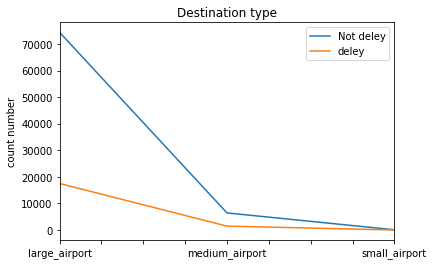

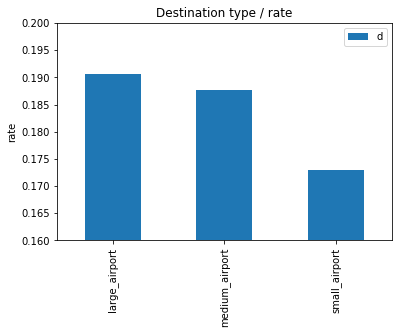

In [24]:
plt.figure()
deley_dest={}
for tp in ['large_airport','medium_airport','small_airport']:
    deley_dest[tp]=data_train.dep_delayed_15min[data_train.Dest_type==tp].value_counts()

deley_dest=pd.DataFrame(deley_dest)

deley_dest.transpose().plot()
plt.title('Destination type')
plt.ylabel('count number')  
plt.legend(['Not deley','deley'])

plt.figure()
rate_dest=deley_dest.loc[1]/deley_dest.sum()
rate_dest.plot(kind='bar',ylim=[0.16,0.2])
plt.title('Destination type / rate')
plt.ylabel('rate')  
plt.legend('delay rate')

<Figure size 432x288 with 0 Axes>

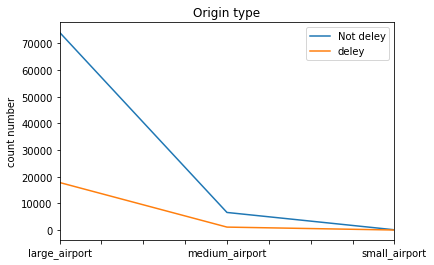

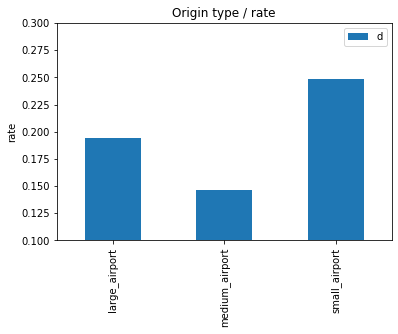

In [25]:
plt.figure()
deley_orign={}
for tp in ['large_airport','medium_airport','small_airport']:
    deley_orign[tp]=data_train.dep_delayed_15min[data_train.Origin_type==tp].value_counts()

deley_orign=pd.DataFrame(deley_orign)

deley_orign.transpose().plot()
plt.title('Origin type')
plt.ylabel('count number')  
plt.legend(['Not deley','deley'])

plt.figure()
rate_orign=deley_orign.loc[1]/deley_orign.sum()
rate_orign.plot(kind='bar',ylim=[0.1,0.3])
plt.title('Origin type / rate')
plt.ylabel('rate')  
plt.legend('delay rate')

In [26]:
save_Dest_type = data_train['Dest_type']
save_Origin_type = data_train['Origin_type']
data_train.drop(['Dest_type'],inplace=True,axis=1)
data_train.drop(['Origin_type'],inplace=True,axis=1)

## data processing(4) district

In [27]:
airport=pd.read_csv('airport_nonull.csv')
#所有出现过的机场
place=set(data_train['Dest'].values)|set(data_train['Origin'].values)
#建立转换字典
place2region={airport.iata_code.values[i]:airport.iso_region.values[i] for i in range(9120) if airport.iata_code.values[i] in place}

data_train['region_dest']=data_train['Dest'].map(place2region)
data_train['region_orig']=data_train['Origin'].map(place2region)

dummies_train_region_Dest=pd.get_dummies(data_train['region_dest'],prefix='region_dest')
dummies_train_region_Origin=pd.get_dummies(data_train['region_orig'],prefix='region_orig')
data_train=pd.concat([data_train,dummies_train_region_Dest,dummies_train_region_Origin],axis=1)

data_train['notdelayed']=1-data_train['dep_delayed_15min']

save_Origin = data_train['Origin']
save_Dest = data_train['Dest']

data_train.drop(['Origin'],inplace=True,axis=1)
data_train.drop(['Dest'],inplace=True,axis=1)

In [28]:
len(set(place2region.values()))

53

### filter

In [29]:
data_region=data_train.groupby(by='region_dest').sum()
data_region

,Month,DayofMonth,DayOfWeek,DepTime,Distance,dep_delayed_15min,DepTime_hour,DepTime_min,mae_Afternoon,mae_Morning,...,region_orig_US-TX,region_orig_US-UT,region_orig_US-VA,region_orig_US-VT,region_orig_US-WA,region_orig_US-WI,region_orig_US-WV,region_orig_US-WY,region_orig_VI-U-A,notdelayed
region_dest,,,,,,,,,,,,,,,,,,,,,
PR-U-A,2719,6288,1597,478878,603212,74,4667,12178,96.0,185.0,...,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,331
US-AK,4011,9247,2402,883633,511677,162,8654,18233,155.0,154.0,...,8.0,8.0,0.0,0.0,142.0,0.0,0.0,0.0,0.0,441
US-AL,4048,9484,2465,903752,273136,127,8855,18252,184.0,215.0,...,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,497
US-AR,2987,7313,1779,653970,220665,110,6404,13570,158.0,139.0,...,226.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,345
US-AZ,20731,49247,12326,4134804,2702548,536,40426,92204,924.0,1018.0,...,343.0,137.0,0.0,0.0,109.0,13.0,0.0,0.0,0.0,2575
US-CA,77970,186484,46653,16504813,9692120,2196,161579,346913,3664.0,3646.0,...,766.0,395.0,0.0,0.0,470.0,6.0,0.0,0.0,0.0,9682
US-CO,22163,52128,13370,4308857,2615697,544,42086,100257,1085.0,1093.0,...,339.0,158.0,0.0,0.0,104.0,17.0,0.0,52.0,0.0,2797
US-CT,3530,8185,2133,776733,377475,109,7620,14733,175.0,160.0,...,15.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,420
US-DC,18679,46182,11531,3877729,2106336,498,37872,90529,864.0,934.0,...,159.0,7.0,23.0,15.0,33.0,0.0,6.0,0.0,0.0,2437


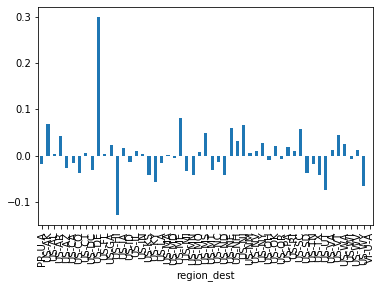

In [30]:
data_region['count']=data_region['dep_delayed_15min']+data_region['notdelayed']
data_region['rate']=data_region['dep_delayed_15min'] / data_region['count']
#dest_group.sort_values(by=['count'],inplace=True)
#dest_group['count'].quantile(0.9)
(data_region['rate']-0.2).plot(kind='bar')
#plt.axhline(y=0.2,color='red', linestyle=':')

In [31]:
data_region['rate2']=abs(data_region['rate']-0.2)
data_region['rate2'].quantile(0.85)

0.05751167314245294

In [32]:
data_region_small = data_region[data_region['rate2'] > 0.055]
dest_index = set(data_region_small.index.tolist())

In [33]:
len(dest_index)

10

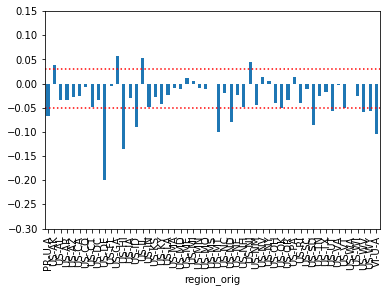

In [34]:
data_region=data_train.groupby(by='region_orig').sum()
data_region['count']=data_region['dep_delayed_15min']+data_region['notdelayed']
data_region['rate']=data_region['dep_delayed_15min'] / data_region['count']
#dest_group.sort_values(by=['count'],inplace=True)
#dest_group['count'].quantile(0.9)
(data_region['rate']-0.2).plot(kind='bar',ylim=[-0.3,0.15])
plt.axhline(y=0.03,color='red', linestyle=':')
plt.axhline(y=-0.05,color='red', linestyle=':')

In [35]:
data_region['rate2']=abs(data_region['rate']-0.2)
data_region['rate2'].quantile(0.7)

0.04802392739273929

In [36]:
data_region_small_1 = data_region[(data_region['rate']-0.2) > 0.03]
orig_index_p = set(data_region_small_1.index.tolist())

data_region_small_2 = data_region[(data_region['rate']-0.2) < -0.05]
orig_index_n = set(data_region_small_2.index.tolist())

orig_index = orig_index_p | orig_index_n
len(orig_index)

16

In [37]:
setdest=set(dummies_train_region_Dest.columns.tolist())
setorigin=set(dummies_train_region_Origin.columns.tolist())

In [38]:
index=set(data_train.columns.tolist())
indexdest=index&setdest
indexorigin=index&setorigin

data_train['region_dest_other']=0
data_train['region_orig_other']=0

for index in indexorigin:
    if index[12:] not in orig_index:
        data_train['region_orig_other'] = data_train['region_orig_other'] + data_train[index]
        del data_train[index]
        
index=data_train.columns.tolist()

for index in indexdest:
    if index[12:] not in dest_index:
        data_train['region_dest_other'] = data_train['region_dest_other'] + data_train[index]
        del data_train[index]



In [39]:
save_region_dest=data_train['region_dest']
del data_train['region_dest']

save_region_orig=data_train['region_orig']
del data_train['region_orig']

**data：**  
1.Month    
2.DayofMonth    
3.DayOfWeek    
4.DepTime    
5.UniuqeCarrier_  
6.Origin_  
7.Dest_  
8.Distance    
9.dep_delayed_15min  
10.DepTime_hour  
11.DepTime_min  
12.Dest_type_  
13.Origin_type_  
14.mae_  
15.region_orig(other)  
16.region_dest(other)    

In [40]:
data_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 646 columns):
Month                         int32
DayofMonth                    int32
DayOfWeek                     int32
DepTime                       int64
Distance                      int64
dep_delayed_15min             int64
DepTime_hour                  int64
DepTime_min                   int64
mae_Afternoon                 uint8
mae_Morning                   uint8
mae_Night                     uint8
Origin_ABE                    uint8
Origin_ABI                    uint8
Origin_ABQ                    uint8
Origin_ABY                    uint8
Origin_ACK                    uint8
Origin_ACT                    uint8
Origin_ACV                    uint8
Origin_ACY                    uint8
Origin_ADK                    uint8
Origin_ADQ                    uint8
Origin_AEX                    uint8
Origin_AGS                    uint8
Origin_AKN                    uint8
Origin_ALB               

# desicison tree
## holdout method

In [41]:
from sklearn.model_selection import train_test_split

X=data_train.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance')
y=data_train.dep_delayed_15min

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123,stratify=y)

## small tree

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn import tree

clf1 = tree.DecisionTreeClassifier(random_state=123,max_depth=8,class_weight='balanced',max_features=10,max_leaf_nodes=100)
clf1.fit(X_train,y_train)

y_pred = clf1.predict(X_test)

cmatrix_clf1 = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)

In [43]:
cmatrix_clf1

array([[13283, 11004],
       [ 2045,  3668]], dtype=int64)

In [44]:
np.bincount(y_test)

array([24287,  5713], dtype=int64)

In [45]:
from sklearn.metrics import recall_score
rs_org=recall_score(y_test, y_pred, labels=True, pos_label=1, average='binary', sample_weight=None)
from sklearn.metrics import precision_score
ps_org=precision_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
from sklearn.metrics import f1_score
f1_org=f1_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

print(' recall_score : ',rs_org,'\n precision_score : ',ps_org,'\n f1_score : ',f1_org)

 recall_score :  0.6420444600035008 
 precision_score :  0.25 
 f1_score :  0.35987245523669364


## compared with imbalanced data

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn import tree

clf1 = tree.DecisionTreeClassifier(random_state=123,max_depth=8,max_features=5,max_leaf_nodes=100)
clf1.fit(X_train,y_train)

y_pred = clf1.predict(X_test)

cmatrix_clf1 = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
from sklearn.metrics import recall_score
rs=recall_score(y_test, y_pred, labels=True, pos_label=1, average='binary', sample_weight=None)
from sklearn.metrics import precision_score
ps=precision_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
from sklearn.metrics import f1_score
f1=f1_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

print(' recall_score : ',rs,'\n precision_score : ',ps,'\n f1_score : ',f1)

 recall_score :  0.0012252756870295817 
 precision_score :  0.23333333333333334 
 f1_score :  0.002437750304718788


## add features

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
Month                         100000 non-null int32
DayofMonth                    100000 non-null int32
DayOfWeek                     100000 non-null int32
Distance                      100000 non-null int64
mae_Afternoon                 100000 non-null uint8
mae_Morning                   100000 non-null uint8
mae_Night                     100000 non-null uint8
Dest_type_large_airport       100000 non-null uint8
Dest_type_medium_airport      100000 non-null uint8
Dest_type_small_airport       100000 non-null uint8
Origin_type_large_airport     100000 non-null uint8
Origin_type_medium_airport    100000 non-null uint8
Origin_type_small_airport     100000 non-null uint8
dtypes: int32(3), int64(1), uint8(9)
memory usage: 2.8 MB


**test:**  
1.UniuqeCarrier_  
2.Origin_  
3.Dest_  
4.DepTime  
5.DepTime_hour  
6.DepTime_min  

In [48]:
X_add, X_test, y_add, y_test = train_test_split(data_train, y, test_size=0.3, random_state=123,stratify=y)

X_train_1=X_add.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|UniuqeCarrier_.*')
X_test_1=X_test.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|UniuqeCarrier_.*')
X_train_2=X_add.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|Origin_.*')
X_test_2=X_test.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|Origin_.*')
X_train_3=X_add.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|Dest_.*')
X_test_3=X_test.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|Dest_.*')
X_train_4=X_add.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|DepTime')
X_test_4=X_test.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|DepTime')
X_train_5=X_add.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|DepTime_hour')
X_test_5=X_test.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|DepTime_hour')
X_train_6=X_add.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|DepTime_min')
X_test_6=X_test.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|DepTime_min')

y=data_train.dep_delayed_15min

addlist=[X_train_1,X_train_2,X_train_3,X_train_4,X_train_5,X_train_6]
addtest=[X_test_1,X_test_2,X_test_3,X_test_4,X_test_5,X_test_6]

add_recall=[]
add_precision=[]
add_f1=[]

for X_train,X_test in zip(addlist,addtest):
    
    clf = tree.DecisionTreeClassifier(random_state=123,max_depth=8,class_weight='balanced',max_features=10,max_leaf_nodes=100)
    clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)
    
    rs=recall_score(y_test, y_pred, labels=True, pos_label=1, average='binary', sample_weight=None)
    add_recall.append(rs)
    
    ps=precision_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    add_precision.append(ps)
    
    f1=f1_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    add_f1.append(f1)

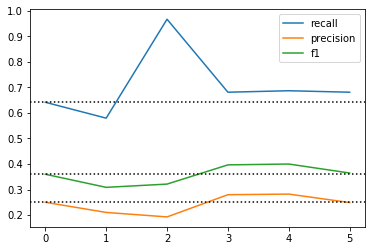

In [49]:
plt.figure()
plt.plot(add_recall)
plt.plot(add_precision)
plt.plot(add_f1)
plt.legend(['recall','precision','f1'])

plt.axhline(y=rs_org,color='black', linestyle=':')
plt.axhline(y=ps_org,color='black', linestyle=':')
plt.axhline(y=f1_org,color='black', linestyle=':')

In [50]:
data_type=data_train.filter(regex='Origin_type.*|Dest_type.*')
type_large=data_type['Origin_type_large_airport']+data_type['Dest_type_large_airport']
type_medium=data_type['Origin_type_medium_airport']+data_type['Dest_type_medium_airport']
type_small=data_type['Origin_type_small_airport']+data_type['Dest_type_small_airport']

In [51]:
data_train['ctype_large']=type_large
data_train['ctype_medium']=type_medium
data_train['ctype_small']=type_small

In [52]:
from sklearn.model_selection import train_test_split

X=data_train.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance')
y=data_train.dep_delayed_15min

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123,stratify=y)

clf = tree.DecisionTreeClassifier(random_state=123,max_depth=8,max_features=5,max_leaf_nodes=100,class_weight='balanced')
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import recall_score
rs_c=recall_score(y_test, y_pred, labels=True, pos_label=1, average='binary', sample_weight=None)
from sklearn.metrics import precision_score
ps_c=precision_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
from sklearn.metrics import f1_score
f1_c=f1_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

print(' recall_score : ',rs_c,'\n precision_score : ',ps_c,'\n f1_score : ',f1_c)

 recall_score :  0.6915806056362681 
 precision_score :  0.24794477565108253 
 f1_score :  0.3650221729490022


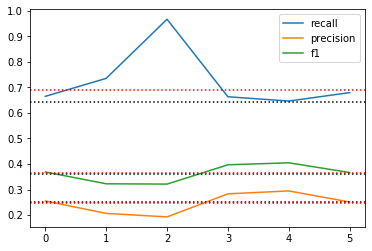

In [53]:
X_add, X_test, y_add, y_test = train_test_split(data_train, y, test_size=0.3, random_state=123,stratify=y)

X_train_1=X_add.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|UniuqeCarrier_.*')
X_test_1=X_test.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|UniuqeCarrier_.*')
X_train_2=X_add.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|Origin_.*')
X_test_2=X_test.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|Origin_.*')
X_train_3=X_add.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|Dest_.*')
X_test_3=X_test.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|Dest_.*')
X_train_4=X_add.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|DepTime')
X_test_4=X_test.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|DepTime')
X_train_5=X_add.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|DepTime_hour')
X_test_5=X_test.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|DepTime_hour')
X_train_6=X_add.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|DepTime_min')
X_test_6=X_test.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|DepTime_min')

y=data_train.dep_delayed_15min

addlist=[X_train_1,X_train_2,X_train_3,X_train_4,X_train_5,X_train_6]
addtest=[X_test_1,X_test_2,X_test_3,X_test_4,X_test_5,X_test_6]

add_recall=[]
add_precision=[]
add_f1=[]

for X_train,X_test in zip(addlist,addtest):
    
    clf = tree.DecisionTreeClassifier(random_state=123,max_depth=8,class_weight='balanced',max_features=10,max_leaf_nodes=100)
    clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)
    
    rs=recall_score(y_test, y_pred, labels=True, pos_label=1, average='binary', sample_weight=None)
    add_recall.append(rs)
    
    ps=precision_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    add_precision.append(ps)
    
    f1=f1_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    add_f1.append(f1)
    
plt.figure()
plt.plot(add_recall)
plt.plot(add_precision)
plt.plot(add_f1)
plt.legend(['recall','precision','f1'])

plt.axhline(y=rs_org,color='black', linestyle=':')
plt.axhline(y=ps_org,color='black', linestyle=':')
plt.axhline(y=f1_org,color='black', linestyle=':')

plt.axhline(y=rs_c,color='red', linestyle=':')
plt.axhline(y=ps_c,color='red', linestyle=':')
plt.axhline(y=f1_c,color='red', linestyle=':')

事实证明效果差不多。。。那就用这个合并的吧，特征少一个是一个

## split

In [54]:
data_26 = data_train.filter(regex='dep_delayed_15min|mae_.*|ctype*|Month|DayofMonth|DayOfWeek|Distance')

data_nb=data_26.copy()
del data_nb['dep_delayed_15min']

target = data_26['dep_delayed_15min']

X_train, X_test, y_train, y_test = train_test_split(data_nb, target, test_size=0.1, random_state=123,stratify=target)
data_eq1 = X_train[data_train['dep_delayed_15min']==1]
data_test1=y_train[data_train['dep_delayed_15min']==1]
data_eq0 = X_train[data_train['dep_delayed_15min']==0]
data_test0=y_train[data_train['dep_delayed_15min']==0]

C:\Users\hjs34\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\hjs34\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


In [55]:
n=int(data_eq0.shape[0]/4)
rng = np.random.RandomState(seed=123)
seeds = list(np.arange(4*n))
rng.shuffle(seeds)
seed1 = seeds[:n]
seed2 = seeds[n:2*n]
seed3 = seeds[2*n:3*n]
seed4 = seeds[3*n:4*n]
seed=[seed1,seed2,seed3,seed4]

In [56]:
data1 = pd.concat([data_eq0.iloc[seed1],data_eq1])
data2 = pd.concat([data_eq0.iloc[seed2],data_eq1])
data3 = pd.concat([data_eq0.iloc[seed3],data_eq1])
data4 = pd.concat([data_eq0.iloc[seed4],data_eq1])

test1 = pd.concat([data_test0.iloc[seed1],data_test1])
test2 = pd.concat([data_test0.iloc[seed2],data_test1])
test3 = pd.concat([data_test0.iloc[seed3],data_test1])
test4 = pd.concat([data_test0.iloc[seed4],data_test1])

In [57]:
clf = tree.DecisionTreeClassifier(random_state=123,max_depth=8,max_features=5,max_leaf_nodes=100)
clf.fit(data1,test1)

y_pred = clf.predict(X_test)

cmatrix_clf = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)

rs=recall_score(y_test, y_pred, labels=True, pos_label=1, average='binary', sample_weight=None)

ps=precision_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

f1=f1_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

print(' recall_score : ',rs,'\n precision_score : ',ps,'\n f1_score : ',f1)

 recall_score :  0.6559873949579832 
 precision_score :  0.25594262295081965 
 f1_score :  0.3682193396226415


In [58]:
cmatrix_clf

array([[4465, 3631],
       [ 655, 1249]], dtype=int64)

In [59]:
sum(y_pred[y_test==1]==1)

1249

### learning curve

In [60]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5),scoring=None):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\hjs34\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

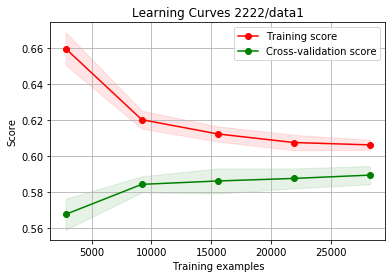

In [61]:
title = "Learning Curves 2222/data1"
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
estimator = tree.DecisionTreeClassifier(random_state=123,max_depth=8,max_features=5,max_leaf_nodes=100)
plot_learning_curve(estimator, title, data1, test1, cv=cv, n_jobs=-1,scoring=None)

<module 'matplotlib.pyplot' from 'C:\\Users\\hjs34\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

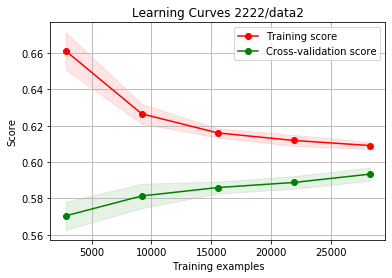

In [62]:
title = "Learning Curves 2222/data2"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = tree.DecisionTreeClassifier(random_state=123,max_depth=8,max_features=5,max_leaf_nodes=100)
plot_learning_curve(estimator, title, data3, test3, cv=cv, n_jobs=-1,scoring=None)

**现在data_train拥有的数据：**  
1.Month    
2.DayofMonth    
3.DayOfWeek    
4.DepTime    
5.UniuqeCarrier_  
6.Origin_  
7.Dest_  
8.Distance    
9.dep_delayed_15min  
10.DepTime_hour  
11.DepTime_min  
12.Dest_type_  
13.Origin_type_  
14.mae_  
15.region_orig(other)  
16.region_dest(other)   

### Month change(6)
距离一点用都没有

In [63]:
data_train['new_month']=0
pmonth = set([6,7])
nmonth = set([2,4,5,10,11])
othermonth=set([1,3,8,9,12])
nmmap={}
for i in range(1,13):
    if i in pmonth:
        nmmap[i]=1
    elif i in nmonth:
        nmmap[i]=-1
    else:
        nmmap[i]=0
        

data_train['new_month']=data_train['Month'].map(nmmap)

In [64]:
data_train[['new_month','Month']].head(n=10)

,new_month,Month
0,0,8
1,-1,4
2,0,9
3,-1,11
4,-1,10
5,0,8
6,0,1
7,-1,4
8,1,7
9,1,6


In [65]:
#data_26 = data_train.filter(regex='dep_delayed_15min|mae_.*|ctype*|Month|DayofMonth|DayOfWeek|Distance')
data_262 = data_train.filter(regex='dep_delayed_15min|new_month|region_dest.*|region_orig.*|DepTime_hour|mae_.*|UniuqeCarrier_|DayofMonth|ctype*')

data_nb=data_262.copy()
del data_nb['dep_delayed_15min']

target = data_262['dep_delayed_15min']

X_train, X_test, y_train, y_test = train_test_split(data_nb, target, test_size=0.1, random_state=123,stratify=target)
data_eq1 = X_train[data_train['dep_delayed_15min']==1]
data_test1=y_train[data_train['dep_delayed_15min']==1]
data_eq0 = X_train[data_train['dep_delayed_15min']==0]
data_test0=y_train[data_train['dep_delayed_15min']==0]

n=int(data_eq0.shape[0]/4)
rng = np.random.RandomState(seed=123)
seeds = list(np.arange(4*n))
rng.shuffle(seeds)
seed1 = seeds[:n]
seed2 = seeds[n:2*n]
seed3 = seeds[2*n:3*n]
seed4 = seeds[3*n:4*n]
seed=[seed1,seed2,seed3,seed4]

data1 = pd.concat([data_eq0.iloc[seed1],data_eq1])
data2 = pd.concat([data_eq0.iloc[seed2],data_eq1])
data3 = pd.concat([data_eq0.iloc[seed3],data_eq1])
data4 = pd.concat([data_eq0.iloc[seed4],data_eq1])

test1 = pd.concat([data_test0.iloc[seed1],data_test1])
test2 = pd.concat([data_test0.iloc[seed2],data_test1])
test3 = pd.concat([data_test0.iloc[seed3],data_test1])
test4 = pd.concat([data_test0.iloc[seed4],data_test1])

clf = tree.DecisionTreeClassifier(random_state=123,max_depth=8,max_features=5,max_leaf_nodes=100)
clf.fit(data1,test1)

y_pred = clf.predict(X_test)

#cmatrix_clf = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
rs=recall_score(y_test, y_pred, labels=True, pos_label=1, average='binary', sample_weight=None)
ps=precision_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
f1=f1_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
print(' recall_score : ',rs,'\n precision_score : ',ps,'\n f1_score : ',f1)

 recall_score :  0.7962184873949579 
 precision_score :  0.26260176684566083 
 f1_score :  0.39494594242542663


C:\Users\hjs34\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\hjs34\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


<module 'matplotlib.pyplot' from 'C:\\Users\\hjs34\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

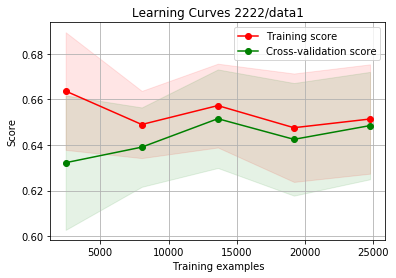

In [66]:
title = "Learning Curves 2222/data1"
cv = ShuffleSplit(n_splits=20, test_size=0.3, random_state=0)
estimator = tree.DecisionTreeClassifier(random_state=123,max_depth=8,max_features=5,max_leaf_nodes=100)
plot_learning_curve(estimator, title, data1, test1, cv=cv, n_jobs=-1,scoring='f1')

### combind

In [67]:
def data4split(data,test_size=0.1,random_state=123):
    data_nb=data.copy()
    del data_nb['dep_delayed_15min']

    target = data['dep_delayed_15min']

    X_train, X_test, y_train, y_test = train_test_split(data_nb, target, test_size=test_size, random_state=random_state,stratify=target)
    data_eq1 = X_train[data_train['dep_delayed_15min']==1]
    data_test1=y_train[data_train['dep_delayed_15min']==1]
    data_eq0 = X_train[data_train['dep_delayed_15min']==0]
    data_test0=y_train[data_train['dep_delayed_15min']==0]

    n=int(data_eq0.shape[0]/4)
    rng = np.random.RandomState(seed=123)
    seeds = list(np.arange(4*n))
    rng.shuffle(seeds)
    seed1 = seeds[:n]
    seed2 = seeds[n:2*n]
    seed3 = seeds[2*n:3*n]
    seed4 = seeds[3*n:4*n]
    seed=[seed1,seed2,seed3,seed4]

    data1 = pd.concat([data_eq0.iloc[seed1],data_eq1])
    data2 = pd.concat([data_eq0.iloc[seed2],data_eq1])
    data3 = pd.concat([data_eq0.iloc[seed3],data_eq1])
    data4 = pd.concat([data_eq0.iloc[seed4],data_eq1])
    X_split=[data1,data2,data3,data4]

    test1 = pd.concat([data_test0.iloc[seed1],data_test1])
    test2 = pd.concat([data_test0.iloc[seed2],data_test1])
    test3 = pd.concat([data_test0.iloc[seed3],data_test1])
    test4 = pd.concat([data_test0.iloc[seed4],data_test1])
    y_split=[test1,test2,test3,test4]
    
    return X_split,X_test,y_split,y_test

In [68]:
data_262 = data_train.filter(regex='dep_delayed_15min|new_month|region_dest.*|region_orig.*|DepTime_hour|mae_.*|UniuqeCarrier_.*|DayofMonth|ctype*')

X_split,X_test,y_split,y_test=data4split(data_262)

clf = tree.DecisionTreeClassifier(random_state=123,max_depth=8,max_features=5,max_leaf_nodes=100)
y_pred=[0,0,0,0]

for i in range(4):
    clf.fit(X_split[i],y_split[i])
    y_pred[i] = clf.predict_proba(X_test)

C:\Users\hjs34\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\hjs34\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [69]:
y_comb = (y_pred[0]+y_pred[1]+y_pred[2]+y_pred[3])/4

In [70]:
y_predict = [0 if i>=0.5 else 1 for i in y_comb[:,0]]

In [71]:
np.mean(y_predict == y_test)

0.5455

In [72]:
rs=recall_score(y_test, y_predict, labels=True, pos_label=1, average='binary', sample_weight=None)
ps=precision_score(y_test, y_predict, labels=None, pos_label=1, average='binary', sample_weight=None)
f1=f1_score(y_test, y_predict, labels=None, pos_label=1, average='binary', sample_weight=None)
print(' recall_score : ',rs,'\n precision_score : ',ps,'\n f1_score : ',f1)

 recall_score :  0.7862394957983193 
 precision_score :  0.26566104702750665 
 f1_score :  0.3971348985276562


## feature selection

In [73]:
datas=pd.read_csv('datasimple.csv')
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 50 columns):
Month                         100000 non-null int64
DayofMonth                    100000 non-null int64
DayOfWeek                     100000 non-null int64
DepTime                       100000 non-null int64
Distance                      100000 non-null int64
dep_delayed_15min             100000 non-null int64
DepTime_hour                  100000 non-null int64
DepTime_min                   100000 non-null int64
mae_Afternoon                 100000 non-null int64
mae_Morning                   100000 non-null int64
mae_Night                     100000 non-null int64
Dest_type_large_airport       100000 non-null int64
Dest_type_medium_airport      100000 non-null int64
Dest_type_small_airport       100000 non-null int64
Origin_type_large_airport     100000 non-null int64
Origin_type_medium_airport    100000 non-null int64
Origin_type_small_airport     100000 non-null int64
region

In [75]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 50 columns):
Month                         100000 non-null int64
DayofMonth                    100000 non-null int64
DayOfWeek                     100000 non-null int64
DepTime                       100000 non-null int64
Distance                      100000 non-null int64
dep_delayed_15min             100000 non-null int64
DepTime_hour                  100000 non-null int64
DepTime_min                   100000 non-null int64
mae_Afternoon                 100000 non-null int64
mae_Morning                   100000 non-null int64
mae_Night                     100000 non-null int64
Dest_type_large_airport       100000 non-null int64
Dest_type_medium_airport      100000 non-null int64
Dest_type_small_airport       100000 non-null int64
Origin_type_large_airport     100000 non-null int64
Origin_type_medium_airport    100000 non-null int64
Origin_type_small_airport     100000 non-null int64
region

### Uniq-carr(6)

In [77]:
data_uni= pd.DataFrame({'uni':save_UniqueCarrier,'target':datas.dep_delayed_15min,'miss':1-datas.dep_delayed_15min})
data_uni=data_uni.groupby(save_UniqueCarrier).sum()
data_uni['ratio']=data_uni['target'] / (data_uni['target']+data_uni['miss'])

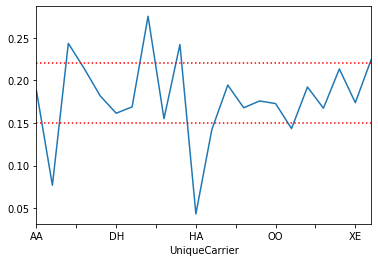

In [78]:
data_uni.iloc[:,2].plot()
plt.axhline(y=0.22,color='red', linestyle=':')
plt.axhline(y=0.15,color='red', linestyle=':')

In [81]:
uni_1 = set(data_uni[data_uni['ratio']>0.22].index)
uni_n1 = set(data_uni[data_uni['ratio']<0.15].index)
other = set(data_uni.index)-uni_1-uni_n1

index=save_UniqueCarrier
unimap={}
for i in index:
    if i in uni_1:
        key=i
        unimap[key] = 1
    elif i in uni_n1:
        key=i
        unimap[key] = -1
    else:
        key=i
        unimap[key] = 0


data_train['less_UC']=save_UniqueCarrier.map(unimap)

In [82]:
data_train = pd.read_csv('data_train.csv')
data_262 = data_train.filter(regex='dep_delayed_15min|new_month|region_dest.*|region_orig.*|mae_.*|less_UC|DayofMonth|ctype*|DepTime_hour|Distance')

X_split,X_test,y_split,y_test=data4split(data_262)

clf = tree.DecisionTreeClassifier(random_state=123,max_depth=8,max_features=5,max_leaf_nodes=100)
y_pred=[0,0,0,0]

for i in range(4):
    clf.fit(X_split[i],y_split[i])
    y_pred[i] = clf.predict_proba(X_test)
    
y_comb = (y_pred[0]+y_pred[1]+y_pred[2]+y_pred[3])/4

y_predict = [0 if i>=0.5 else 1 for i in y_comb[:,0]]

rs=recall_score(y_test, y_predict, labels=True, pos_label=1, average='binary', sample_weight=None)
ps=precision_score(y_test, y_predict, labels=None, pos_label=1, average='binary', sample_weight=None)
f1=f1_score(y_test, y_predict, labels=None, pos_label=1, average='binary', sample_weight=None)
print(' recall_score : ',rs,'\n precision_score : ',ps,'\n f1_score : ',f1)

C:\Users\hjs34\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\hjs34\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


 recall_score :  0.625 
 precision_score :  0.3006568974229409 
 f1_score :  0.4060047765267827


## SFS

In [83]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(clf, k_features=(15,30),
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='f1',
          n_jobs=-1,
           cv=4)

feature_names = X_split[0].columns.tolist()

sfs1 = sfs1.fit(X_split[0].values, y_split[0],custom_feature_names=feature_names)
sfs1.k_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    8.6s finished

[2019-12-17 22:01:31] Features: 37/15 -- score: 0.654749229555549[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    4.3s finished

[2019-12-17 22:01:36] Features: 36/15 -- score: 0.6408669689528447[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    3.7s finished

[2019-12-17 22:01:40] Features: 35/15 -- score: 0.6524399683162369[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    4.0s finished

[2019-12-17 22:01:44] Features: 34/15 -- score: 0.6592588779645954[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    3.3s finishe

0.6735773141867163

In [84]:
X_split[0]

,DayofMonth,Distance,DepTime_hour,mae_Afternoon,mae_Morning,mae_Night,region_dest_US-AK,region_dest_US-DE,region_dest_US-HI,region_dest_US-KY,...,region_orig_US-VT,region_orig_US-WV,region_orig_US-WY,region_orig_VI-U-A,region_dest_other,region_orig_other,ctype_large,ctype_medium,ctype_small,new_month
30639,2,361,11,0,1,0,0,0,0,0,...,0,0,0,0,1,1,2,0,0,-1
94586,12,861,9,0,1,0,0,0,0,0,...,0,0,0,0,1,1,2,0,0,-1
58077,30,950,20,0,0,1,0,0,0,0,...,0,0,0,0,1,1,2,0,0,-1
64467,13,103,12,0,0,1,0,0,0,0,...,0,0,0,0,1,1,1,1,0,0
24546,11,948,16,1,0,0,0,0,0,0,...,0,0,0,0,1,1,2,0,0,0
16532,4,342,7,0,1,0,0,0,0,0,...,0,0,0,0,1,1,2,0,0,-1
80642,28,401,8,0,1,0,0,0,0,0,...,0,0,0,0,1,1,2,0,0,0
86635,7,544,9,0,1,0,0,0,0,0,...,0,0,0,0,1,1,2,0,0,-1
75247,6,1416,7,0,1,0,0,0,0,0,...,0,0,0,0,1,1,2,0,0,-1
14039,8,212,10,0,1,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,0


In [85]:
sfs1.k_feature_names_

('DayofMonth',
 'Distance',
 'DepTime_hour',
 'region_dest_US-AK',
 'region_dest_US-DE',
 'region_dest_US-HI',
 'region_dest_US-KY',
 'region_dest_US-ME',
 'region_dest_US-SC',
 'region_orig_PR-U-A',
 'region_orig_US-DE',
 'region_orig_US-GA',
 'region_orig_US-HI',
 'region_orig_US-ID',
 'region_orig_US-IL',
 'region_orig_US-MT',
 'region_orig_US-ND',
 'region_orig_US-NJ',
 'region_orig_US-SD',
 'region_orig_US-UT',
 'region_orig_US-VT',
 'region_orig_US-WV',
 'region_orig_US-WY',
 'region_orig_VI-U-A',
 'region_dest_other',
 'region_orig_other',
 'ctype_large',
 'ctype_medium')

In [86]:
sfs2 = SFS(clf, k_features=22,
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='recall',
          n_jobs=-1,
           cv=4)

feature_names = X_split[0].columns.tolist()

sfs2 = sfs2.fit(X_split[0].values, y_split[0],custom_feature_names=feature_names)

sfs2.k_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    3.9s finished

[2019-12-17 22:02:33] Features: 37/22 -- score: 0.7515169194865811[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    4.1s finished

[2019-12-17 22:02:37] Features: 36/22 -- score: 0.7494165694282381[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    3.8s finished

[2019-12-17 22:02:41] Features: 35/22 -- score: 0.7649941656942824[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    4.0s finished

[2019-12-17 22:02:45] Features: 34/22 -- score: 0.7477829638273046[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    3.3s finish

0.7985997666277713

In [87]:
sfs2.k_feature_names_

('Distance',
 'mae_Morning',
 'region_dest_US-AK',
 'region_dest_US-HI',
 'region_dest_US-ME',
 'region_dest_US-NE',
 'region_dest_US-NJ',
 'region_dest_US-SC',
 'region_dest_US-WY',
 'region_orig_PR-U-A',
 'region_orig_US-AK',
 'region_orig_US-HI',
 'region_orig_US-ID',
 'region_orig_US-ND',
 'region_orig_US-SD',
 'region_orig_US-UT',
 'region_orig_US-VT',
 'region_orig_US-WV',
 'region_orig_VI-U-A',
 'region_dest_other',
 'region_orig_other',
 'ctype_large')

In [88]:
nameset=set(sfs1.k_feature_names_)|set(sfs2.k_feature_names_)

In [89]:
set(sfs2.k_feature_names_)-set(sfs1.k_feature_names_)

{'mae_Morning',
 'region_dest_US-NE',
 'region_dest_US-NJ',
 'region_dest_US-WY',
 'region_orig_US-AK'}

In [90]:
sfs2 = SFS(clf, k_features=(15,30),
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
          n_jobs=-1,
           cv=4)

feature_names = X_split[0].columns.tolist()

sfs3 = sfs2.fit(X_split[0].values, y_split[0],custom_feature_names=feature_names)

sfs3.k_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    4.0s finished

[2019-12-17 22:03:23] Features: 37/15 -- score: 0.6353838873836228[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    3.7s finished

[2019-12-17 22:03:27] Features: 36/15 -- score: 0.6179887552954091[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    3.7s finished

[2019-12-17 22:03:31] Features: 35/15 -- score: 0.6239287732541454[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    3.4s finished

[2019-12-17 22:03:34] Features: 34/15 -- score: 0.6212417377101283[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    3.4s finish

0.635779888580872

In [91]:
setacc=set(sfs3.k_feature_names_)